 **<center>Weather Prediction**

---






#Weather forecasting, the prediction of the weather through application of the principles of physics, supplemented by a variety of statistical and empirical techniques.

#The model is trained on past weather data, which differs from standard numerical weather prediction models that create mathematical representations of physical laws.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data Mining/seattle-weather.csv')

In [ ]:
df.sample(10)

,date,precipitation,temp_max,temp_min,wind,weather
818,2014-03-29,14.0,11.7,7.2,5.1,rain
915,2014-07-04,0.0,23.9,13.9,3.6,sun
319,2012-11-15,0.0,9.4,2.8,2.4,drizzle
452,2013-03-28,2.0,16.1,8.3,1.3,rain
55,2012-02-25,0.0,7.2,2.8,6.4,rain
409,2013-02-13,2.3,9.4,7.2,4.1,rain
1435,2015-12-06,11.2,12.8,7.2,5.9,rain
1305,2015-07-29,0.0,32.2,14.4,3.8,sun
713,2013-12-14,0.0,9.4,6.1,3.7,sun
667,2013-10-29,0.0,13.3,3.3,2.2,sun


In [ ]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

Hence no missing data found in dataset

##Now converting data, data type to date time format

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.sample(10)

,date,precipitation,temp_max,temp_min,wind,weather
1253,2015-06-07,0.0,31.1,15.6,3.2,sun
924,2014-07-13,0.0,29.4,15.0,2.6,sun
720,2013-12-21,5.6,8.9,5.6,2.3,rain
1096,2015-01-01,0.0,5.6,-3.2,1.2,sun
1107,2015-01-12,0.0,11.1,4.4,1.6,fog
764,2014-02-03,0.0,5.0,0.0,4.3,sun
1359,2015-09-21,0.0,18.3,9.4,2.7,fog
1392,2015-10-24,0.0,15.0,8.9,2.9,fog
1319,2015-08-12,7.6,28.3,16.7,2.7,rain
1095,2014-12-31,0.0,3.3,-2.7,3.0,sun


##Count number of distinc elements in specified axis

In [ ]:
df.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

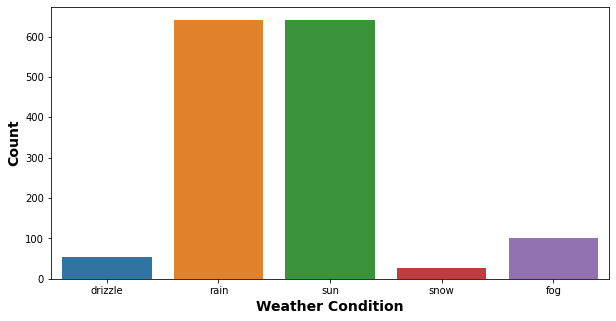

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'weather',data = df)
plt.xlabel("Weather Condition",fontweight='bold',size=14)
plt.ylabel("Count",fontweight='bold',size=14)
plt.show()

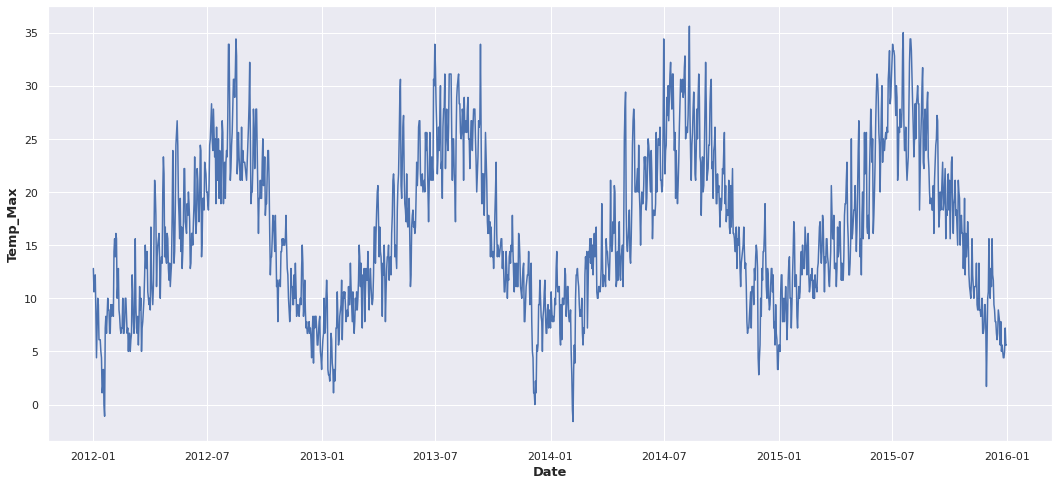

In [ ]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_max',data=df)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Temp_Max",fontweight='bold',size=13)
plt.show()

<Figure size 1008x576 with 0 Axes>

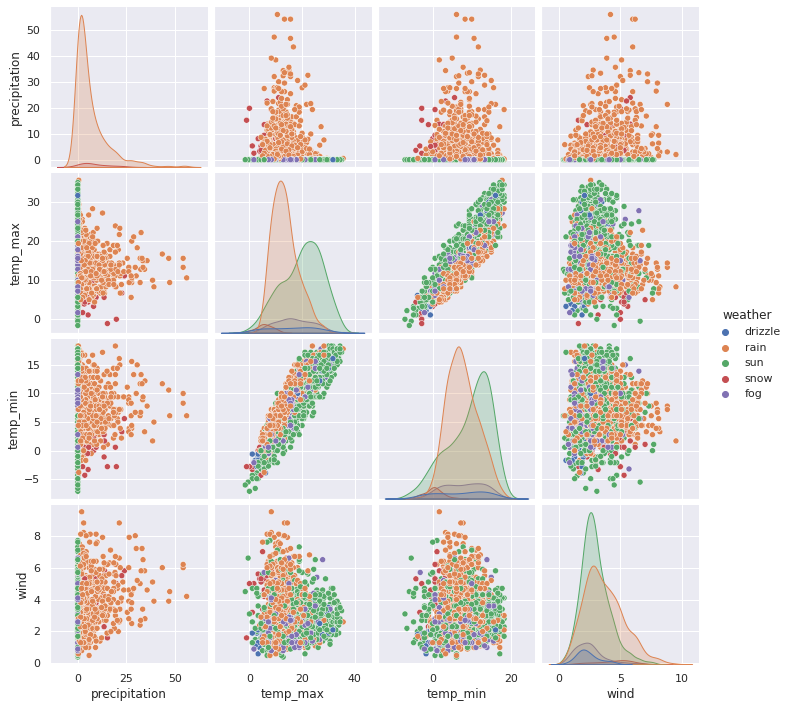

In [ ]:
plt.figure(figsize=(14,8))
sns.pairplot(df.drop('date',axis=1),hue='weather')
plt.show()

In [ ]:
classes={
        'drizzle':0,
        'fog':1,
        'rain':2,
        'snow':3,
        'sun':4
}

In [ ]:
dataset=df.drop('date', axis=1)

In [ ]:
dataset['weather']=dataset['weather'].astype('category')
dataset['weather']=dataset['weather'].cat.codes

##Preparing X data and Y data for model training

In [ ]:
x = dataset.drop('weather',axis=1)
y = dataset['weather']

In [ ]:
x

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [ ]:
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int8

##Split the dataset into train and test




In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state =42)

In [ ]:
print("*"*40)
print("Shape of x training data : ",x_train.shape)
print("Shape of y training data : ",y_train.shape)
print("*"*40)
print("Shape of x testing data : ",x_test.shape)
print("Shape of y testing data : ",y_test.shape)
print("*"*40)

****************************************
Shape of x training data :  (1095, 4)
Shape of y training data :  (1095,)
****************************************
Shape of x testing data :  (366, 4)
Shape of y testing data :  (366,)
****************************************


In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

##Models Included

In [ ]:
# model
from sklearn.linear_model import LogisticRegression
classifier_log=LogisticRegression(random_state=0)
classifier_log.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
# model
from sklearn.neighbors import KNeighborsClassifier
classifier_knn=KNeighborsClassifier(n_neighbors = 5)
classifier_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
# model 
from sklearn.svm import SVC
classifier_svc=SVC(kernel = 'linear', random_state=42)
classifier_svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# model
from sklearn.naive_bayes import GaussianNB
classifier_gnb=GaussianNB()
classifier_gnb.fit(x_train, y_train,sample_weight=None)

GaussianNB()

In [ ]:
# model
from sklearn.ensemble import RandomForestClassifier
classifier_rfc=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier_rfc.fit(x_train, y_train,sample_weight=None)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
# model
from sklearn.linear_model import SGDClassifier
classifier_sgdc=SGDClassifier()
classifier_sgdc.fit(x_train, y_train)

SGDClassifier()

In [ ]:
# model
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier_dtc.fit(x_train, y_train,sample_weight=None)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# model
from sklearn.ensemble import GradientBoostingClassifier
classifier_gbc=GradientBoostingClassifier()
classifier_gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
# model
from lightgbm import LGBMClassifier
classifier_lgbm=LGBMClassifier()
classifier_lgbm.fit(x_train, y_train)

LGBMClassifier()

In [ ]:
# model
from xgboost.sklearn import XGBClassifier
classifier_xgb=XGBClassifier()
classifier_xgb.fit(x_train,y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
classifier_list=[classifier_log,classifier_knn,classifier_svc,classifier_gnb,classifier_dtc,classifier_rfc,classifier_sgdc,classifier_gbc,classifier_lgbm,classifier_xgb]

In [ ]:
# accuracy =correct answer(marks)/total marks

def accuracy(X_test, Y_test, classifier):
    print(f"\nclassifier\n{classifier}")
    Y_pred=classifier.predict(X_test)
    correct=0
    total=len(Y_pred)
    for i,j in zip(Y_pred, Y_test):
        if i==j:
            correct+=1
    acc=(correct/total)*100
    print("\n"+str(acc)+"\n"+"-"*30+"\n")
    print("\n"+"*"*50+"\n"+classification_report(Y_test,Y_pred)+"\n")
    cm=confusion_matrix(Y_test,Y_pred)
    print(f"Confusion Matrix\n{cm}\n")
    return acc

In [ ]:
accuracy_list=[]
classifier_list_str=[]

In [ ]:
for clf in classifier_list:
    acc=accuracy(x_test, y_test, clf)
    accuracy_list.append(acc)
    classifier_list_str.append(str(clf)[:6])    


classifier
LogisticRegression(random_state=0)

78.41530054644808
------------------------------


**************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        30
           2       0.89      0.84      0.87       161
           3       1.00      0.12      0.22         8
           4       0.70      0.96      0.81       156

    accuracy                           0.78       366
   macro avg       0.52      0.39      0.38       366
weighted avg       0.72      0.78      0.73       366


Confusion Matrix
[[  0   0   1   0  10]
 [  0   0   3   0  27]
 [  0   0 136   0  25]
 [  0   0   6   1   1]
 [  0   0   6   0 150]]


classifier
KNeighborsClassifier()

73.49726775956285
------------------------------


**************************************************
              precision    recall  f1-score   support

           0       0.20      0.09

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

In [ ]:
accuracy_list

[78.41530054644808,
 73.49726775956285,
 78.14207650273224,
 83.60655737704919,
 71.31147540983606,
 78.41530054644808,
 80.05464480874316,
 82.24043715846994,
 82.24043715846994,
 84.15300546448088]

In [ ]:
classifier_list_str

['Logist',
 'KNeigh',
 'SVC(ke',
 'Gaussi',
 'Decisi',
 'Random',
 'SGDCla',
 'Gradie',
 'LGBMCl',
 'XGBCla']

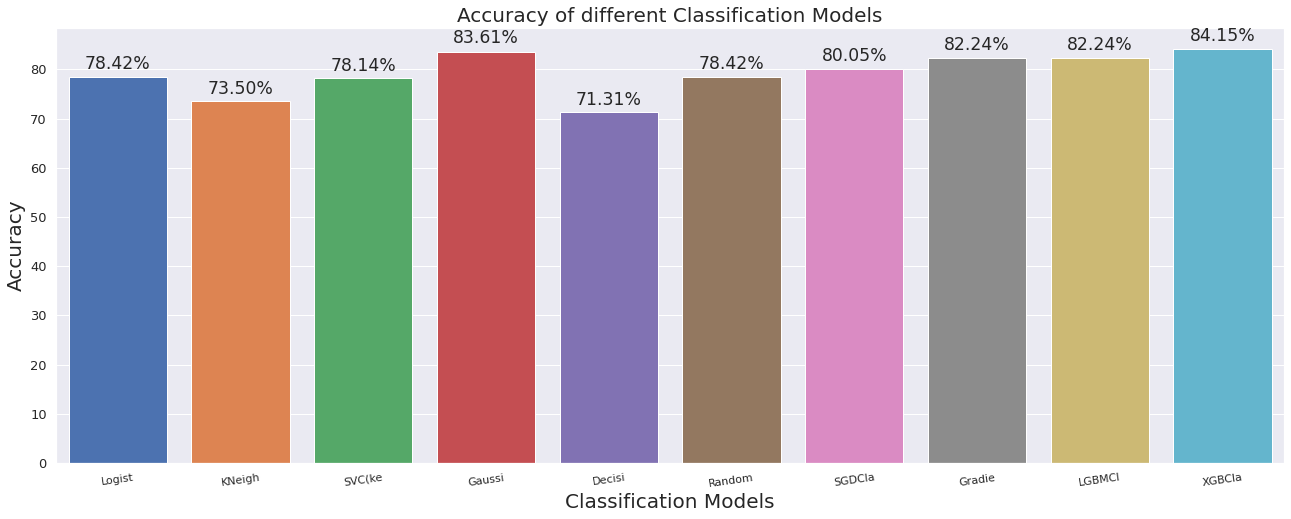

In [ ]:
plt.figure(figsize=(22,8))
ax = sns.barplot(x=classifier_list_str, y=accuracy_list, saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/100:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

**Wiwit Ramadhani**
**H071201086**

---


